# Simple Image Classifier with Pre-Trained image featurizer

To train traditional image classifiers, a large number of images is needed. By utilising the Pre-Trained image featurizer that comes with Microsoft ML Server, we can create a powerful image classifier with very limited training.

In [21]:
library(imager)

Loading required package: plyr
Loading required package: magrittr

Attaching package: 'imager'

The following object is masked from 'package:magrittr':

    add

The following object is masked from 'package:plyr':

    liply

The following objects are masked from 'package:stats':

    convolve, spectrum

The following object is masked from 'package:graphics':

    frame

The following object is masked from 'package:base':

    save.image



In [22]:
#Make sure to set current location as working directory

imageLocation = "Data/Pictures"

images <- c(loadImage(file.path(imageLocation, "Fish/Fish1.jpg"), 
            loadImage(file.path(imageLocation, "Fish/Fish2.jpg"),
            loadImage(file.path(imageLocation, "Fish/Fish3.jpg"),
            loadImage(file.path(imageLocation, "Fish/Fish4.jpg"),
            loadImage(file.path(imageLocation, "Fish/Fish5.jpg"),
            loadImage(file.path(imageLocation, "Helicopter/Helicopter1.jpg"),
            loadImage(file.path(imageLocation, "Helicopter/Helicopter2.jpg"),
            loadImage(file.path(imageLocation, "Helicopter/Helicopter3.jpg"),
            loadImage(file.path(imageLocation, "Helicopter/Helicopter4.jpg"),
            loadImage(file.path(imageLocation, "Helicopter/Helicopter5.jpg"),
            loadImage(file.path(imageLocation, "FighterJet/FighterJet1.jpg"),
            loadImage(file.path(imageLocation, "FighterJet/FighterJet2.jpg"),
            loadImage(file.path(imageLocation, "FIghterJet/FighterJet3.jpg"),
            loadImage(file.path(imageLocation, "FighterJet/FighterJet4.jpg"),
            loadImage(file.path(imageLocation, "FighterJet/FighterJet5.jpg"),
            loadImage(file.path(imageLocation, "cat/cat1.jpg"),
            loadImage(file.path(imageLocation, "cat/cat2.jpg"),
            loadImage(file.path(imageLocation, "cat/cat3.jpg"),
            loadImage(file.path(imageLocation, "cat/cat4.jpg"),
            loadImage(file.path(imageLocation, "cat/cat5.jpg"),
            loadImage(file.path(imageLocation, "cat/cat6.jpg"),
            loadImage(file.path(imageLocation, "dog/dog1.jpeg"),
            loadImage(file.path(imageLocation, "dog/dog2.jpeg"),
            loadImage(file.path(imageLocation, "dog/dog3.jpeg"),
            loadImage(file.path(imageLocation, "dog/dog4.jpeg"),
            loadImage(file.path(imageLocation, "dog/dog5.jpeg")),
            loadImage(file.path(imageLocation, "dog/dog6.jpeg")),
            loadImage(file.path(imageLocation, "monkey/monkey1.jpeg")),
            loadImage(file.path(imageLocation, "monkey/monkey2.jpeg")),
            loadImage(file.path(imageLocation, "monkey/monkey3.jpeg")),
            loadImage(file.path(imageLocation, "monkey/monkey4.jpeg")),
            loadImage(file.path(imageLocation, "monkey/monkey5.jpeg")),
            loadImage(file.path(imageLocation, "monkey/monkey6.jpeg")),
            loadImage(file.path(imageLocation, "table/table1.jpg")),
            loadImage(file.path(imageLocation, "table/table2.jpg")),
            loadImage(file.path(imageLocation, "table/table3.jpg")),
            loadImage(file.path(imageLocation, "table/table4.jpg")),
            loadImage(file.path(imageLocation, "table/table5.jpg")),
            loadImage(file.path(imageLocation, "table/table6.jpg")),
            loadImage(file.path(imageLocation, "flower/flower1.jpg")),
            loadImage(file.path(imageLocation, "flower/flower2.jpg")),
            loadImage(file.path(imageLocation, "flower/flower3.jpg")),
            loadImage(file.path(imageLocation, "flower/flower4.jpg")),
            loadImage(file.path(imageLocation, "flower/flower5.jpg"))
)

In [23]:
imagesDF <- data.frame(Image = images, stringsAsFactors = FALSE)

# Label images
imagesDF$Label <- c("Fish","Fish","Fish","Fish","Fish",
                   "Helicopter","Helicopter","Helicopter","Helicopter","Helicopter",
                   "FighterJet","FighterJet","FighterJet","FighterJet","FighterJet", 'Cat','Cat','Cat',
                   'Cat','Cat','Cat','Dog','Dog','Dog','Dog','Dog','Dog','Monkey','Monkey','Monkey',
                   'Monkey','Monkey','Monkey','Table','Table','Table',
                   'Table','Table','Table', "Flower","Flower","Flower","Flower","Flower")

#head(imagesDF)
#imagesDF$Label[imagesDF$Type == "Fish"] <- 0
#imagesDF$Label[imagesDF$Type == "Helicopter"] <- 1
#imagesDF$Label[imagesDF$Type == "FighterJet"] <- 2
#imagesDF$Label[imagesDF$Type == "Cat"] <- 3
#imagesDF$Label[imagesDF$Type == "Dog"] <- 4
#imagesDF$Label[imagesDF$Type == "Monkey"] <- 5
#imagesDF$Label[imagesDF$Type == "Table"] <- 6
#imagesDF$Label[imagesDF$Type == "Flower"] <- 7
#head(imagesDF)
head(imagesDF)


ERROR: Error in `$<-.data.frame`(`*tmp*`, Label, value = c("Fish", "Fish", "Fish", : replacement has 44 rows, data has 562543


In [18]:
# Now let's train a multiclass model using the image set we have
# We'll use rxLogisticRegression
imagesModel <- rxLogisticRegression(
  formula = Label~Features,
  data = imagesDF,
  type = "multiClass",
  mlTransforms = list(
    resizeImage(vars = "Image", width = 224, height = 224),
    extractPixels(vars = "Features"),
    featurizeImage(var = "Features", dnnModel = "resnet50")) 
)

Elapsed time: 00:00:00.0012612
Error: *** Exception: 'Source column 'Image' has invalid type ('Text'): Expected Image type.
Parameter name: Source'
Error in processing machine learning request.


ERROR: Error in doTryCatch(return(expr), name, parentenv, handler): Error: *** Exception: 'Source column 'Image' has invalid type ('Text'): Expected Image type.
Parameter name: Source'
Error in processing machine learning request.


In [21]:
classImage<-function(path){
  imgDF<-data.frame(Image = path, Label = "", stringsAsFactors = FALSE)
  prediction <- rxPredict(imagesModel, data = imgDF, extraVarsToWrite = list("Label", "Image"), reportProgress = 0)
  #typeOfImage <- imagesDF$Type[which(imagesDF$Label == prediction$PredictedLabel)[[1]]]
  typeOfImage <- prediction$PredictedLabel
  cat(paste("The image is of type: ", typeOfImage))
  plot(load.image(path))
  return(typeOfImage)
}

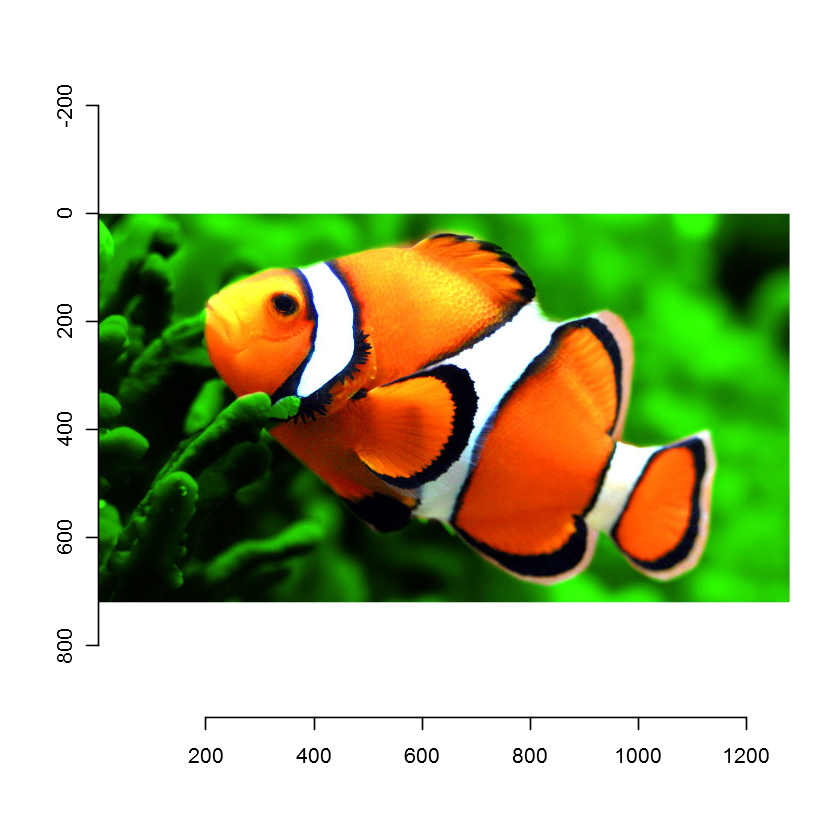

In [20]:
#imageFile <- c(file.path(imageLocation, "Test/table.jpeg"),
#               file.path(imageLocation, "Test/cat.jpg"),
#               file.path(imageLocation, "Test/dog.jpg"),
#               file.path(imageLocation, "Test/fighterjet.jpg"),
#               file.path(imageLocation, "Test/helicopter.jpg"),
#               file.path(imageLocation, "Test/monkey.jpg"),
#               file.path(imageLocation, "Test/fish.jpg"))
#Feel free to download and load your own image from the internet!

#for(img in imageFile){
#    plot(load.image(img))
#    classImage(imgDF)
#}
path<-file.path(imageLocation, "test/fish.jpg")
img<-load.image(path)
plot(img)

Elapsed time: 00:00:04.3502449
The image is of type:  Fish

[1] Fish
Levels: Cat Dog FighterJet Fish Flower Helicopter Monkey Table

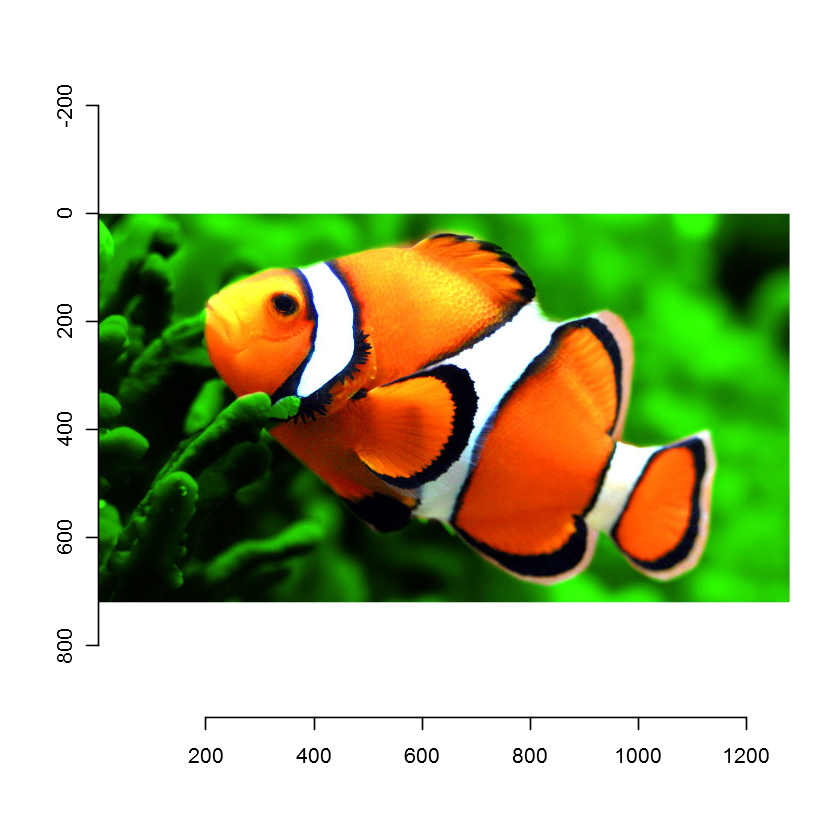

In [22]:
path<- file.path(imageLocation, "test/fish.jpg")
classImage(path)

# Pre-Trained Sentiment Analysis Model

In [12]:
 # Create the data. These phrases can be edited as you wish.
 CustomerReviews <- data.frame(Review = c(
   "I really did not like the taste of it",
   "It was surprisingly quite good!",
   "I will never ever ever go to that place again!!",
     "This phrase is neutral. Your own phrase here.",
     "I had a great time eating bland food and getting ripped off."),
   stringsAsFactors = FALSE)

 # Get the sentiment scores
 sentimentScores <- rxFeaturize(data = CustomerReviews, 
                                mlTransforms = getSentiment(vars = list(SentimentScore = "Review")))

 # Let's translate the score to something more meaningful
 sentimentScores$PredictedRating <- ifelse(sentimentScores$SentimentScore > 0.6, 
                                           "Positive", "Negative")

 # Let's look at the results
 sentimentScores

Beginning processing data.
Rows Read: 5, Read Time: 0, Transform Time: 0
Beginning processing data.
Elapsed time: 00:00:04.9000531
Finished writing 5 rows.
Writing completed.


Review,SentimentScore,PredictedRating
I really did not like the taste of it,0.4617899,Negative
It was surprisingly quite good!,0.9601924,Positive
I will never ever ever go to that place again!!,0.3103435,Negative
This phrase is neutral. Your own phrase here.,0.5000000,Negative
I had a great time eating bland food and getting ripped off.,0.3925641,Negative


In [24]:
remoteLogin("http://localhost:12800", 
            username = "admin", 
            password = "Pass@word1",
            session = FALSE)

api <- publishService(
     "classImage",
     code = classImage,
     model = imagesModel,
     inputs = list(Image = "character"),
     outputs = list(type = "character"),
     v = "v1.0.0"
)

In [26]:
api$classImage(path)

$success
[1] FALSE

$errorMessage
[1] "Error in load.image(path) : could not find function \"load.image\"\ntype could not be returned.\r\n"

$outputParameters
$outputParameters$type
NULL


$outputFiles
named list()

$consoleOutput
[1] "Elapsed time: 00:00:05.1135613\r\nThe image is of type:  Table"

$changedFiles
list()

$artifact
function (filename, dec = TRUE) 
{
    content <- if (!is.null(list())) 
        list()[[filename]]
    else NULL
    if (!is.null(content) && isTRUE(dec)) {
        content <- tryCatch({
            jsonlite::base64_dec(content)
        }, error = function(e) {
            content <- NULL
        })
    }
    content
}
<environment: 0x000000001668d060>

$output
function (output, ...) 
{
    outputs <- list(type = NULL)
    outputSchema <- list(type = "character")
    out <- outputs[[output]]
    if (!is.null(out) && !is.null(outputSchema)) {
        switch(outputSchema[[output]], numeric = out <- as.numeric(out, 
            ...), integer = out <- as.integer